<h1><strong>Task B6: Building an ARIMA model</strong></h1>

In [186]:
import pandas as pd
import numpy as np
import yfinance as yf
import os
import matplotlib.pyplot as plt
import time
import statsmodels.api as sm
import warnings as warning
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

<strong>Loading dateframe and saving if not</strong>

In [187]:
save_local = True
ticker = "META"
start_date = "2010-01-01"
end_date = "2020-01-01"
local_file = f'data/{ticker}_data.csv'

directory = os.path.dirname(local_file)

if save_local and not os.path.exists(directory):
    os.makedirs(directory)
if save_local and local_file and os.path.exists(local_file):
    df = pd.read_csv(local_file, index_col='Date', parse_dates=True)
else:
    df = yf.download(ticker, start=start_date, end=end_date)
    if save_local:
        df.to_csv(local_file)

df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.115242,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.927845,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.906942,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.903940,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.930847,50237200


In [188]:
data_grouped_mouthly = df['Adj_Close'].resample('MS').sum()
data_grouped_mouthly.head(20)

Date
2012-05-01     285.968979
2012-06-01     618.487808
2012-07-01     604.659445
2012-08-01     461.101671
2012-09-01     390.753490
2012-10-01     431.710165
2012-11-01     479.167284
2012-12-01     541.001108
2013-01-01     635.057915
2013-02-01     532.068005
2013-03-01     534.520618
2013-04-01     583.622782
2013-05-01     573.423485
2013-06-01     477.442469
2013-07-01     612.206711
2013-08-01     849.901070
2013-09-01     912.492599
2013-10-01    1158.282543
2013-11-01     944.725544
2013-12-01    1100.666012
Freq: MS, Name: Adj_Close, dtype: float64

<Axes: xlabel='Date'>

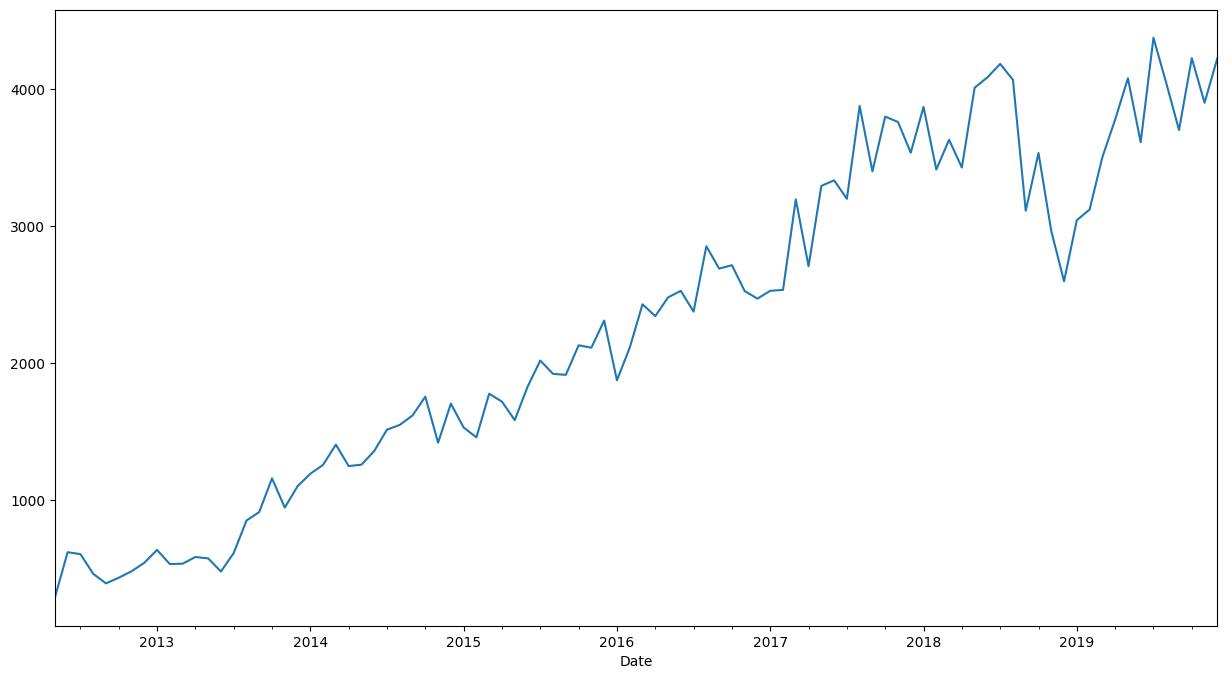

In [189]:
data_grouped_mouthly.plot(figsize=(15, 8))

<strong>Check for stainary dataframes</strong>

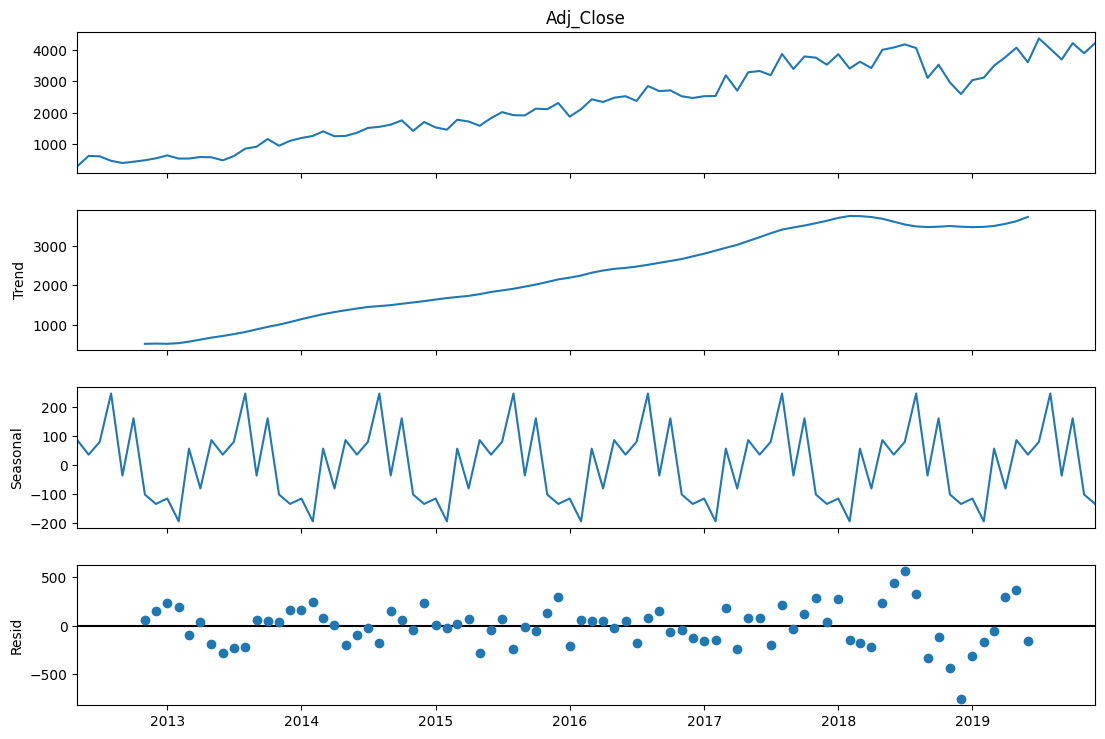

In [190]:
decomposition = sm.tsa.seasonal_decompose(data_grouped_mouthly, model="additive")
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

<strong>adfuller test</strong>

In [191]:
adfuller_test = adfuller(data_grouped_mouthly)
print('P-value adfuller test: ', adfuller_test[1])

P-value adfuller test:  0.8838317390056007


<strong>Train and test split</strong>

In [192]:
train = data_grouped_mouthly[:64]
test = data_grouped_mouthly[64:]

test.head(10)

Date
2017-09-01    3401.578323
2017-10-01    3801.304764
2017-11-01    3762.302170
2017-12-01    3537.678497
2018-01-01    3872.560135
2018-02-01    3414.838318
2018-03-01    3632.343384
2018-04-01    3429.693573
2018-05-01    4012.379196
2018-06-01    4088.310516
Freq: MS, Name: Adj_Close, dtype: float64

<strong>Building ARIMA model</strong>

In [193]:
model = ARIMA(train, order=(5, 0, 4)).fit()

In [194]:
prediction = model.predict(start=len(train), end=(len(data_grouped_mouthly) - 1))
prediction.head(20)

2017-09-01    3420.412215
2017-10-01    3736.698439
2017-11-01    3592.730332
2017-12-01    3511.528572
2018-01-01    3723.310142
2018-02-01    3408.039578
2018-03-01    3700.475577
2018-04-01    3461.133380
2018-05-01    3546.200927
2018-06-01    3586.344657
2018-07-01    3406.143790
2018-08-01    3620.100180
2018-09-01    3394.911982
2018-10-01    3535.345091
2018-11-01    3464.983464
2018-12-01    3415.808291
2019-01-01    3523.686783
2019-02-01    3352.097402
2019-03-01    3496.366803
2019-04-01    3378.840981
Freq: MS, Name: predicted_mean, dtype: float64

<strong>Model Evaluation</strong>

In [195]:
error = np.sqrt(mean_squared_error(test, prediction))
error

491.92365720281583

<Axes: xlabel='Date'>

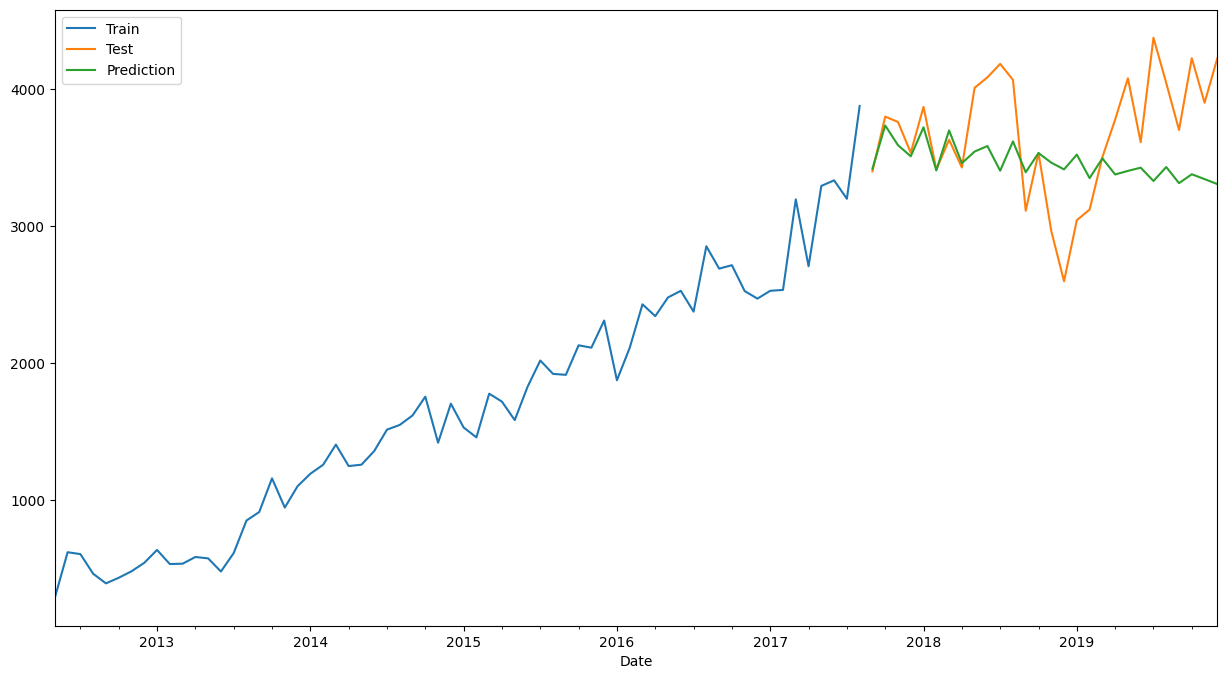

In [196]:
train.plot(legend=True, label="Train", figsize=(15, 8))
test.plot(legend=True, label="Test")
prediction.plot(legend=True, label="Prediction")

<Axes: xlabel='Date'>

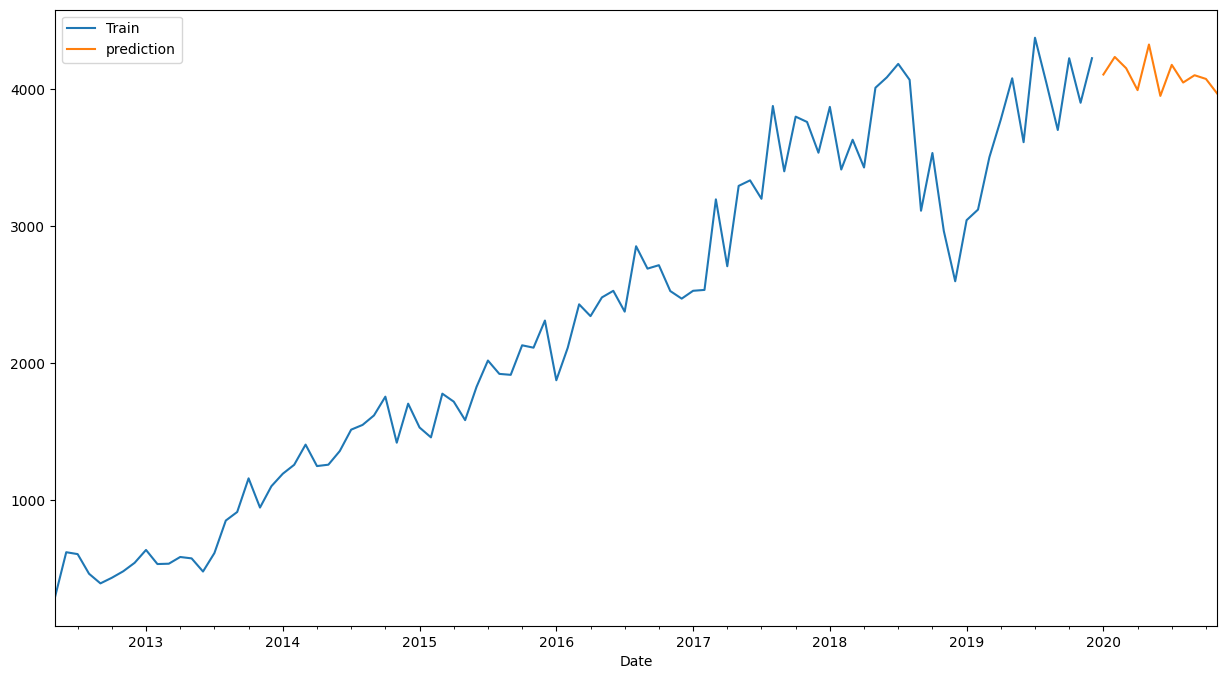

In [197]:
prediction_steps = 10
final_model = ARIMA(data_grouped_mouthly, order=(5, 0, 4)).fit()
final_prediction = final_model.predict(len(data_grouped_mouthly), len(data_grouped_mouthly) + prediction_steps)

data_grouped_mouthly.plot(legend=True, label="Train", figsize=(15, 8))
final_prediction.plot(legend=True, label="prediction")

<strong>ARIMA feture Predictions</strong>

In [198]:
final_prediction

2020-01-01    4108.938513
2020-02-01    4237.463958
2020-03-01    4154.727233
2020-04-01    3994.931040
2020-05-01    4328.286917
2020-06-01    3952.724084
2020-07-01    4179.725150
2020-08-01    4050.532647
2020-09-01    4103.808237
2020-10-01    4076.907426
2020-11-01    3968.495569
Freq: MS, Name: predicted_mean, dtype: float64